# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [15]:
# Create a Beautiful Soup Object

import requests
from bs4 import BeautifulSoup
# Create a Beautiful Soup object

website = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
mars_data = requests.get(website)
soup = BeautifulSoup(mars_data.content, 'html.parser')

print(mars_data.text)


<!doctype html>
<html lang="en">

<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta name="description" content="">
  <title>Mars Temperature Data</title>

  <link rel="stylesheet" type="text/css" href="css/bootstrap.min.5.2.2.css">
  <link rel="stylesheet" type="text/css" href="css/temp.css">
</head>

<body>

  <main>
    <div class="container py-4">
      <header class="pb-3 mb-4 border-bottom">
        <a href="/" class="d-flex align-items-center text-dark text-decoration-none">
          <span class="fs-4">Mission To Mars</span>
        </a>
      </header>

      <div class="p-5 mb-4 bg-light rounded-3">
        <div class="container-fluid py-5">
          <h1 class="display-5 fw-bold">Mars Temperature Data</h1>
          <p class="col-md-8 fs-4">This is Mars data.</p>

          <table class="table">
            <tr>
              <th>id</th>
              <th>terrestrial_date</th>
              <th>sol</th>
            

In [16]:
# Extract all rows of data

table = soup.find('table')
rows = table.find_all('tr')

#for row in data:
    #print(data)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [19]:
# Create an empty list

mars_weather = []

# Loop through the scraped data to create a list of rows
for row in rows:
   weather_data = row.find_all('td')
   row_data = []
   for cell in weather_data:
      row_data.append(cell.text.strip())
   mars_weather.append(row_data)

   #print(data)

In [20]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

column_names = [col_name.text.strip() for col_name in table.find_all('th')]

mars_weather_df = pd.DataFrame(mars_weather, columns=column_names)

mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [21]:
# Confirm DataFrame was created successfully

mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [23]:
# Examine data type of each column

def column_types(mars_weather_df):
    column_types = {}
    for col in mars_weather_df.columns:
        column_types[col] = str(mars_weather_df[col].dtype)
    return column_types
print(column_types(mars_weather_df))

{'id': 'object', 'terrestrial_date': 'object', 'sol': 'object', 'ls': 'object', 'month': 'object', 'min_temp': 'object', 'pressure': 'object'}


In [27]:
# delete rows with none values

mars_weather_df.dropna(inplace=True)
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [34]:
# Change data types for data analysis

#id
mars_weather_df['id'] = mars_weather_df['id'].astype(int)

#terrestrial_date
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

#sol
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)

#ls
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)

#month
mars_weather_df['month'] = mars_weather_df['month'].astype(int)

#min_tem
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)

#pressure
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

print(mars_weather_df.dtypes)


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [35]:
# Confirm type changes were successful by examining data types again

print(mars_weather_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [39]:
# 1. How many months are there on Mars?

total_months = mars_weather_df['month'].max()

print("There are "+str(total_months)+" in Mars")

There are 12 in Mars


In [43]:
# 2. How many Martian days' worth of data are there?

martian_days = mars_weather_df['terrestrial_date'].nunique()

print("there are "+str(martian_days)+" Martian days worth of data in the dataset")


there are 1867 Martian days worth of data in the dataset


In [58]:
# 3. What is the average low temperature by month?

avg_low_temp = mars_weather_df.groupby(mars_weather_df['terrestrial_date'].dt.month)['min_temp'].mean().round(2)

avg_low_temp_df = pd.DataFrame(avg_low_temp)

avg_low_temp_df


,min_temp
terrestrial_date,
1,-76.99
2,-76.91
3,-77.35
4,-76.10
5,-75.57
6,-75.67
7,-76.18
8,-75.85
9,-75.82


In [67]:
#Which month, on average, has the lowest temperature? The highest?

month_lowest_temp = avg_low_temp_df['min_temp'].idxmin()

month_highest_temp = avg_low_temp_df['min_temp'].idxmax()

print("The "+str(month_lowest_temp)+" month on average, has the lowest temperature in Mars")
print("The "+str(month_highest_temp)+" month on average, has the highest temperature in Mars")

The 3 month on average, has the lowest temperature in Mars
The 11 month on average, has the highest temperature in Mars


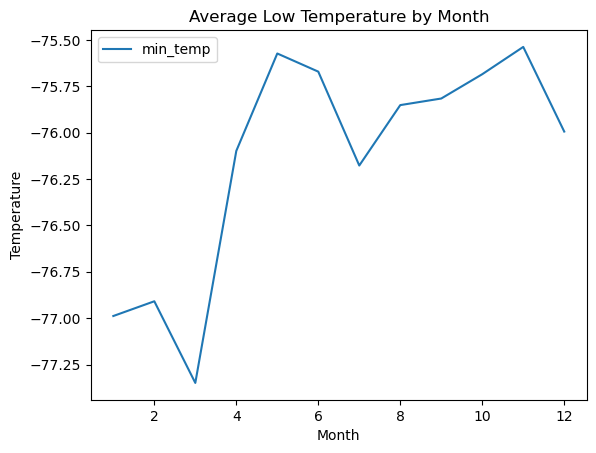

In [49]:
# Plot the average temperature by month

avg_low_temp_df.plot()
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()


In [50]:
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [ ]:
# Identify the coldest and hottest months in Curiosity's location

    # What is curiosity's location?

In [52]:
# 4. Average pressure by Martian month
avg_pressure = mars_weather_df.groupby(mars_weather_df['terrestrial_date'].dt.month)['pressure'].mean().round(2)

avg_pressure_df = pd.DataFrame(avg_pressure)

avg_pressure_df

,pressure
terrestrial_date,
1,861.26
2,837.97
3,827.72
4,817.68
5,803.60
6,807.91
7,822.51
8,829.61
9,845.59


In [68]:
#Which month, on average, has the lowest atmospheric pressure? The highest?

month_lowest_pressure = avg_pressure_df['pressure'].idxmin()

month_highest_pressure = avg_pressure_df['pressure'].idxmax()

print("The "+str(month_lowest_pressure)+" month on average, has the lowest atmospheric pressure in Mars")
print("The "+str(month_highest_pressure)+" month on average, has the highest atmospheric pressure in Mars")

The 5 month on average, has the lowest atmospheric pressure in Mars
The 11 month on average, has the highest atmospheric pressure in Mars


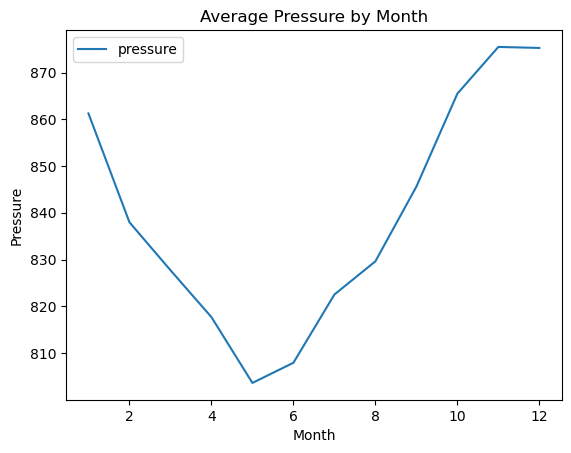

In [54]:
# Plot the average pressure by month
avg_pressure_df.plot()
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.show()

In [71]:
# 5. How many terrestrial (earth) days are there in a Martian year?

terrestrial_days = mars_weather_df['terrestrial_date'].dt.year.value_counts()

terrestrial_days_df = pd.DataFrame({'days': terrestrial_days})

terrestrial_days_df

,days
2014,355
2017,351
2016,345
2015,340
2013,290
2012,130
2018,56


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [73]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather.csv',index=False)
terrestrial_days_df.to_csv('terrestrial_day.csv',index=False)
avg_pressure_df.to_csv('avg_pressure.csv',index=False)
avg_low_temp_df.to_csv('avg_low_temp.csv',index=False)



In [74]:
browser.quit()